In [1]:
# %pip install wget
# !python -m wget  https://www.gutenberg.org/cache/epub/2000/pg2000.txt

In [34]:
import pandas as pd
from pathlib import Path

# ignorar future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [3]:
import time

In [4]:
import itertools

In [5]:
from textwrap import wrap

In [6]:
recursos = Path.cwd() / "recursos"
pi_file = recursos / 'pi50kdigits.txt'
pi_file.exists()

quijote_file = recursos / 'pg2000.txt'
quijote_file.exists()

True

In [13]:
# abrimos el fichero en modo lectura
with open(quijote_file, 'r', encoding='utf-8-sig') as file:
    # read the file betwtween the 37th and last 372 lines
    quijote_data = file.readlines()[36:-372]

# realizamos un join de la lista de lineas para obtener un unico string
quijote_data = ''.join(quijote_data)


# numero de caracteres únicos
u = len(list( dict.fromkeys(quijote_data)))
print("Numero de caracteres únicos: ", u)


# longitud en caracteres del texto
l = len(quijote_data)
print("Longitud en caracteres del texto: ", l)

Numero de caracteres únicos:  91
Longitud en caracteres del texto:  2097953


comprobamos que en los 2500 primeros caracteres ya tenemos el 70 del charset

In [45]:

# contamos el numero de caracteres unicos de forma acumulativa en los 3000 primeros caracteres.
charset_list = []
for i in range(0,3000,1):
    charset_list.append(len(list( dict.fromkeys(quijote_data[:i]))))


# creamos una tabla en jupyter con los valores de charset_list en los 3000 primeros caracteres
df = pd.DataFrame(list(zip(range(0,3000,1), charset_list, [round((x/u)*100,2) for x in charset_list])), columns =['Posición', 'Caracteres únicos', 'Porcentaje de caracteres únicos'])
# formato de la tabla
df.style.format({'Porcentaje de caracteres únicos': '{:,.2f}%'.format})
# mostramos la tabla, eliminando duplicados en  la columna caracteres únicos, conservando el primero, y eliminando el indice.
# damos formato al porcentaje de caracteres únicos para que muestre el simbolo % y dos decimales.

df.drop_duplicates(subset=['Caracteres únicos'], keep='first').reset_index(drop=True).style.format({'Porcentaje de caracteres únicos': '{:,.2f}%'.format}).hide_index()



Posición,Caracteres únicos,Porcentaje de caracteres únicos
0,0,0.00%
1,1,1.10%
2,2,2.20%
3,3,3.30%
4,4,4.40%
5,5,5.49%
6,6,6.59%
7,7,7.69%
10,8,8.79%
11,9,9.89%


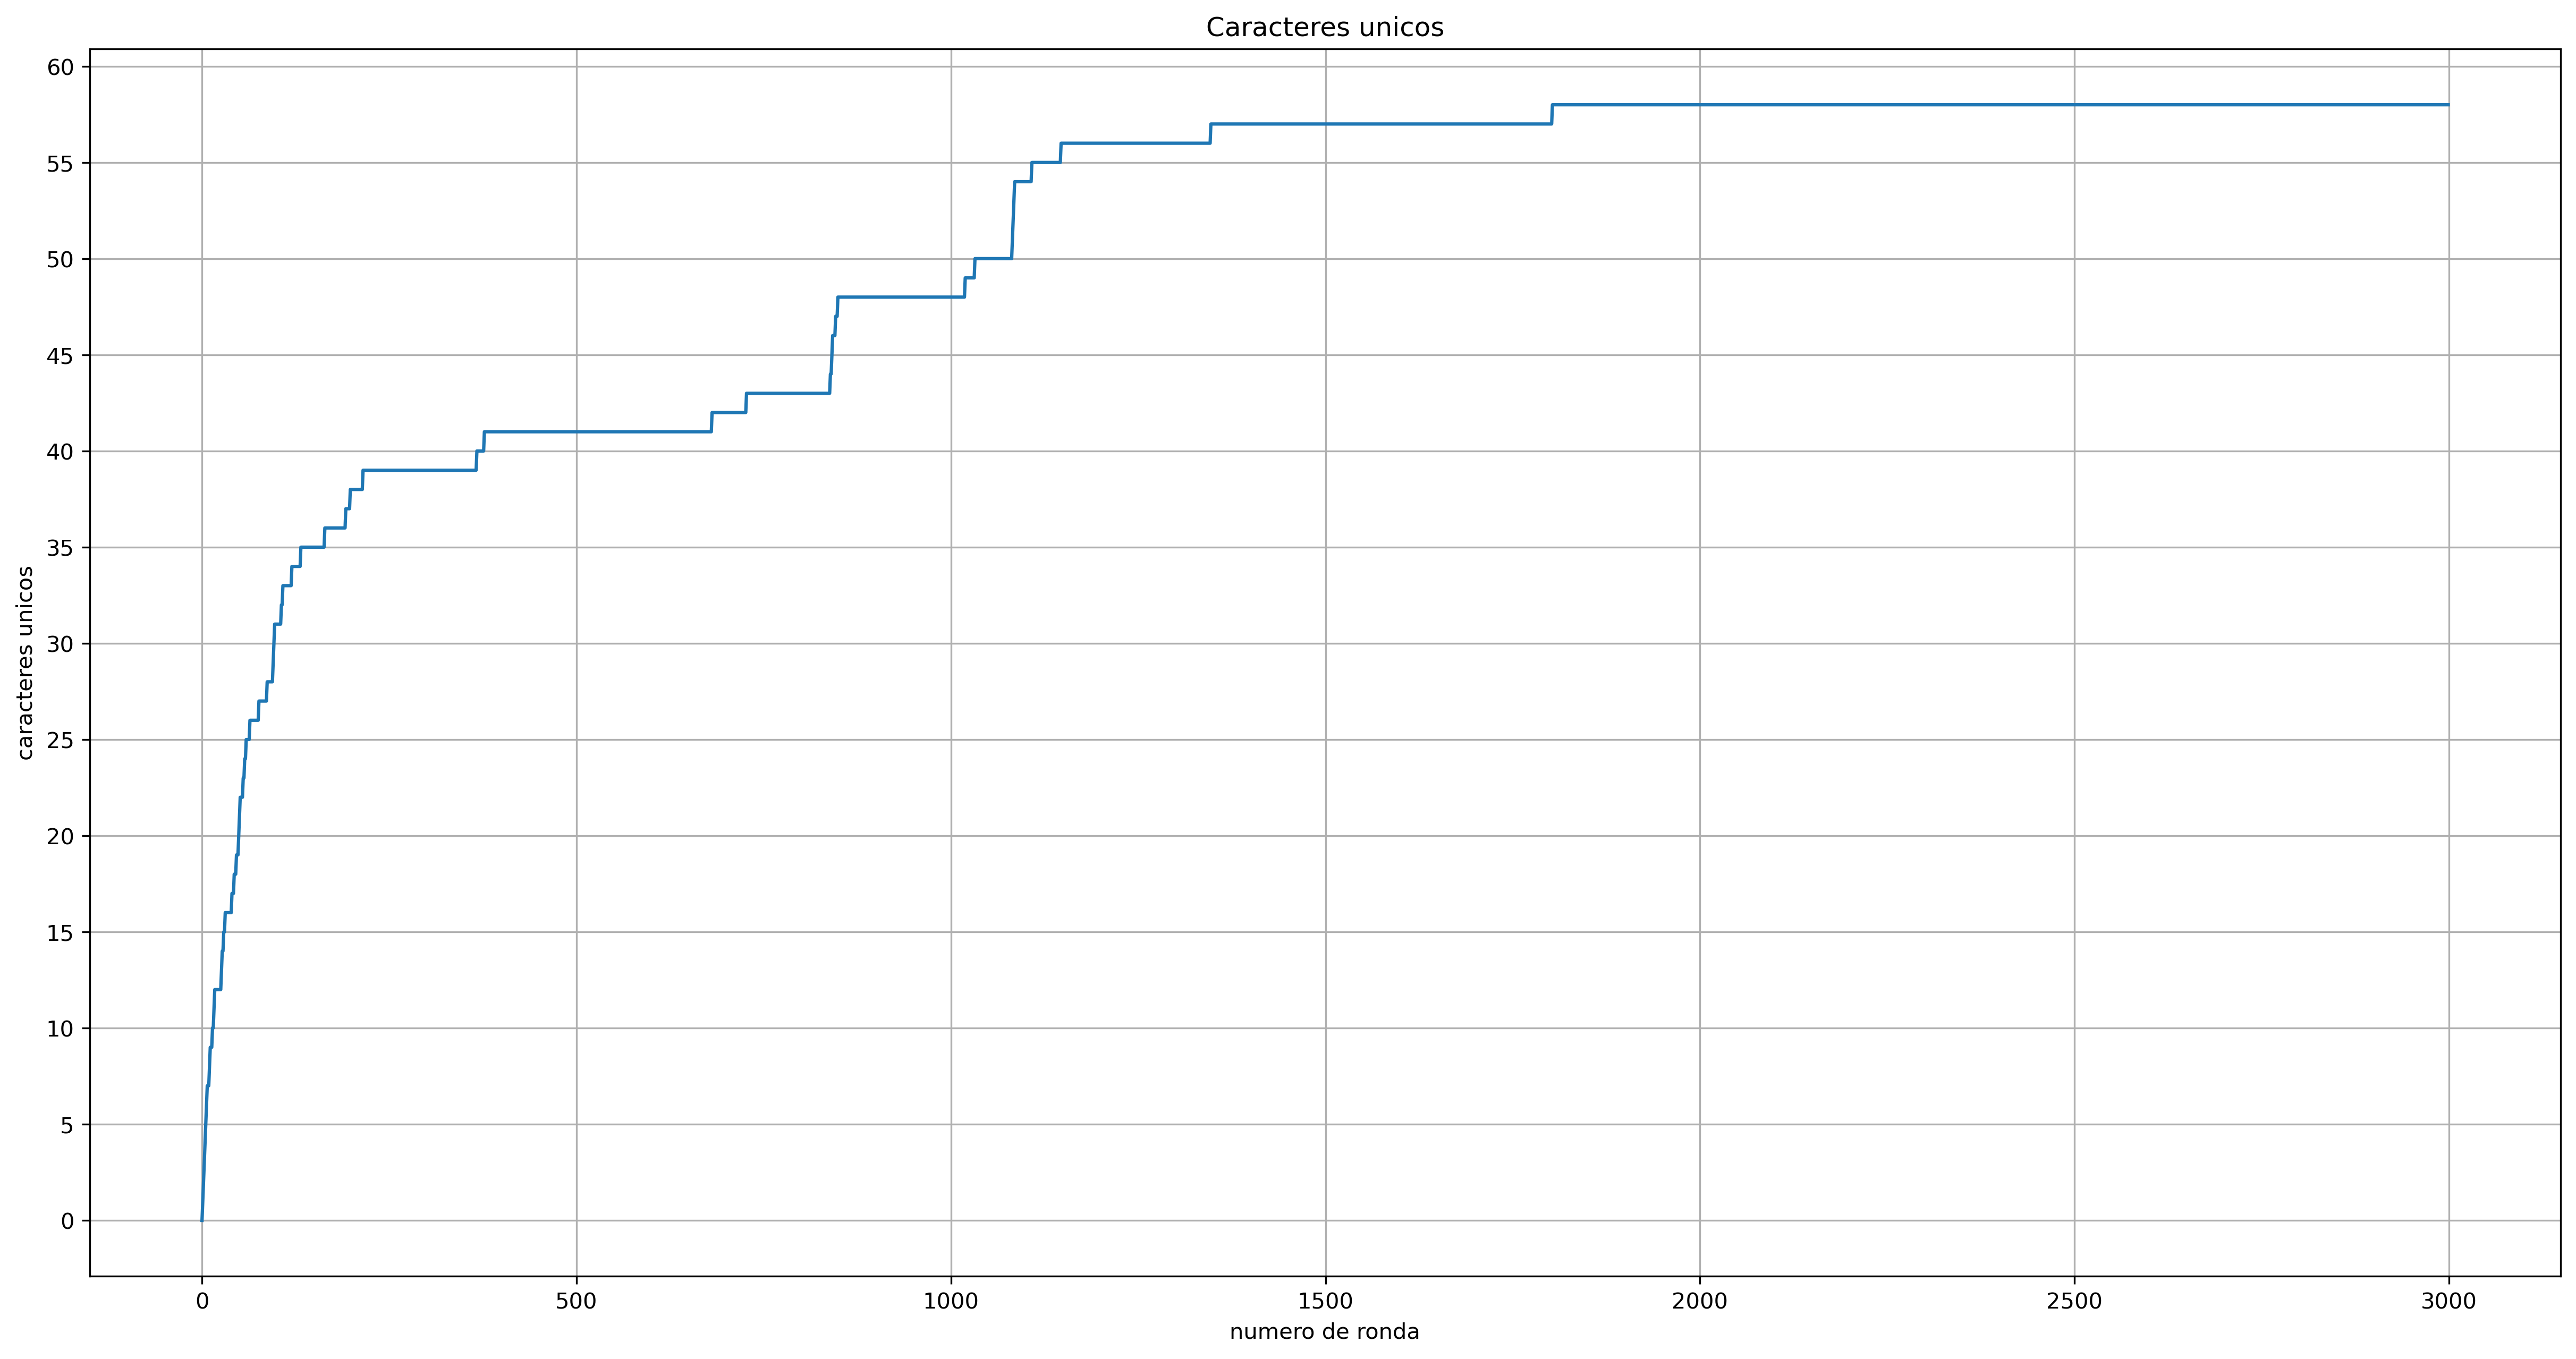

In [46]:

# y lo pintamos en un grafico para ver la tendencia
import matplotlib.pyplot as plt
# damos formato a la salida de los graficos para que se vean bien en la pantalla.
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["figure.dpi"] = 300
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.bbox"] = 'tight'
plt.rcParams["savefig.pad_inches"] = 0.1
plt.rcParams["savefig.transparent"] = True
plt.rcParams["savefig.format"] = 'png'
plt.rcParams["savefig.facecolor"] = 'white'
plt.rcParams["savefig.edgecolor"] = 'white'
plt.rcParams["savefig.orientation"] = 'landscape'
# escala de la y en multiplos de 5 
plt.yticks(range(0, 100, 5))
# incluir grid en el grafico
plt.grid()
# etiquetas de los ejes y titulo
plt.title('Caracteres unicos')
plt.ylabel('caracteres unicos')
plt.xlabel('numero de ronda')
# pintamos el grafico
plt.plot(charset_list)
plt.show()


In [51]:
# realizamos el mismo ejercicio, pero en vez de cada caracter, lo hacemos cada 1000 caracteres, para ver la tendencia en todo el texto.

charset_list_u1000 = []
for i in range(0,l,1000):
    charset_list_u1000.append(len(list( dict.fromkeys(quijote_data[:i]))))

len(charset_list_u1000)

2098

In [53]:
# creamos una tabla en jupyter con los valores de charset_list en los 3000 primeros caracteres
df = pd.DataFrame(list(zip(range(0,3000,1), charset_list_u1000, [round((x/u)*100,2) for x in charset_list_u1000])), columns =['Posición', 'Caracteres únicos', 'Porcentaje de caracteres únicos'])
# formato de la tabla
df.style.format({'Porcentaje de caracteres únicos': '{:,.2f}%'.format})
# mostramos la tabla, eliminando duplicados en  la columna caracteres únicos, conservando el primero, y eliminando el indice.
# damos formato al porcentaje de caracteres únicos para que muestre el simbolo % y dos decimales.

df.drop_duplicates(subset=['Caracteres únicos'], keep='first').reset_index(drop=True).style.format({'Porcentaje de caracteres únicos': '{:,.2f}%'.format}).hide_index()


Posición,Caracteres únicos,Porcentaje de caracteres únicos
0,0,0.00%
1,48,52.75%
2,58,63.74%
5,62,68.13%
6,64,70.33%
7,65,71.43%
9,68,74.73%
10,70,76.92%
13,73,80.22%
21,75,82.42%


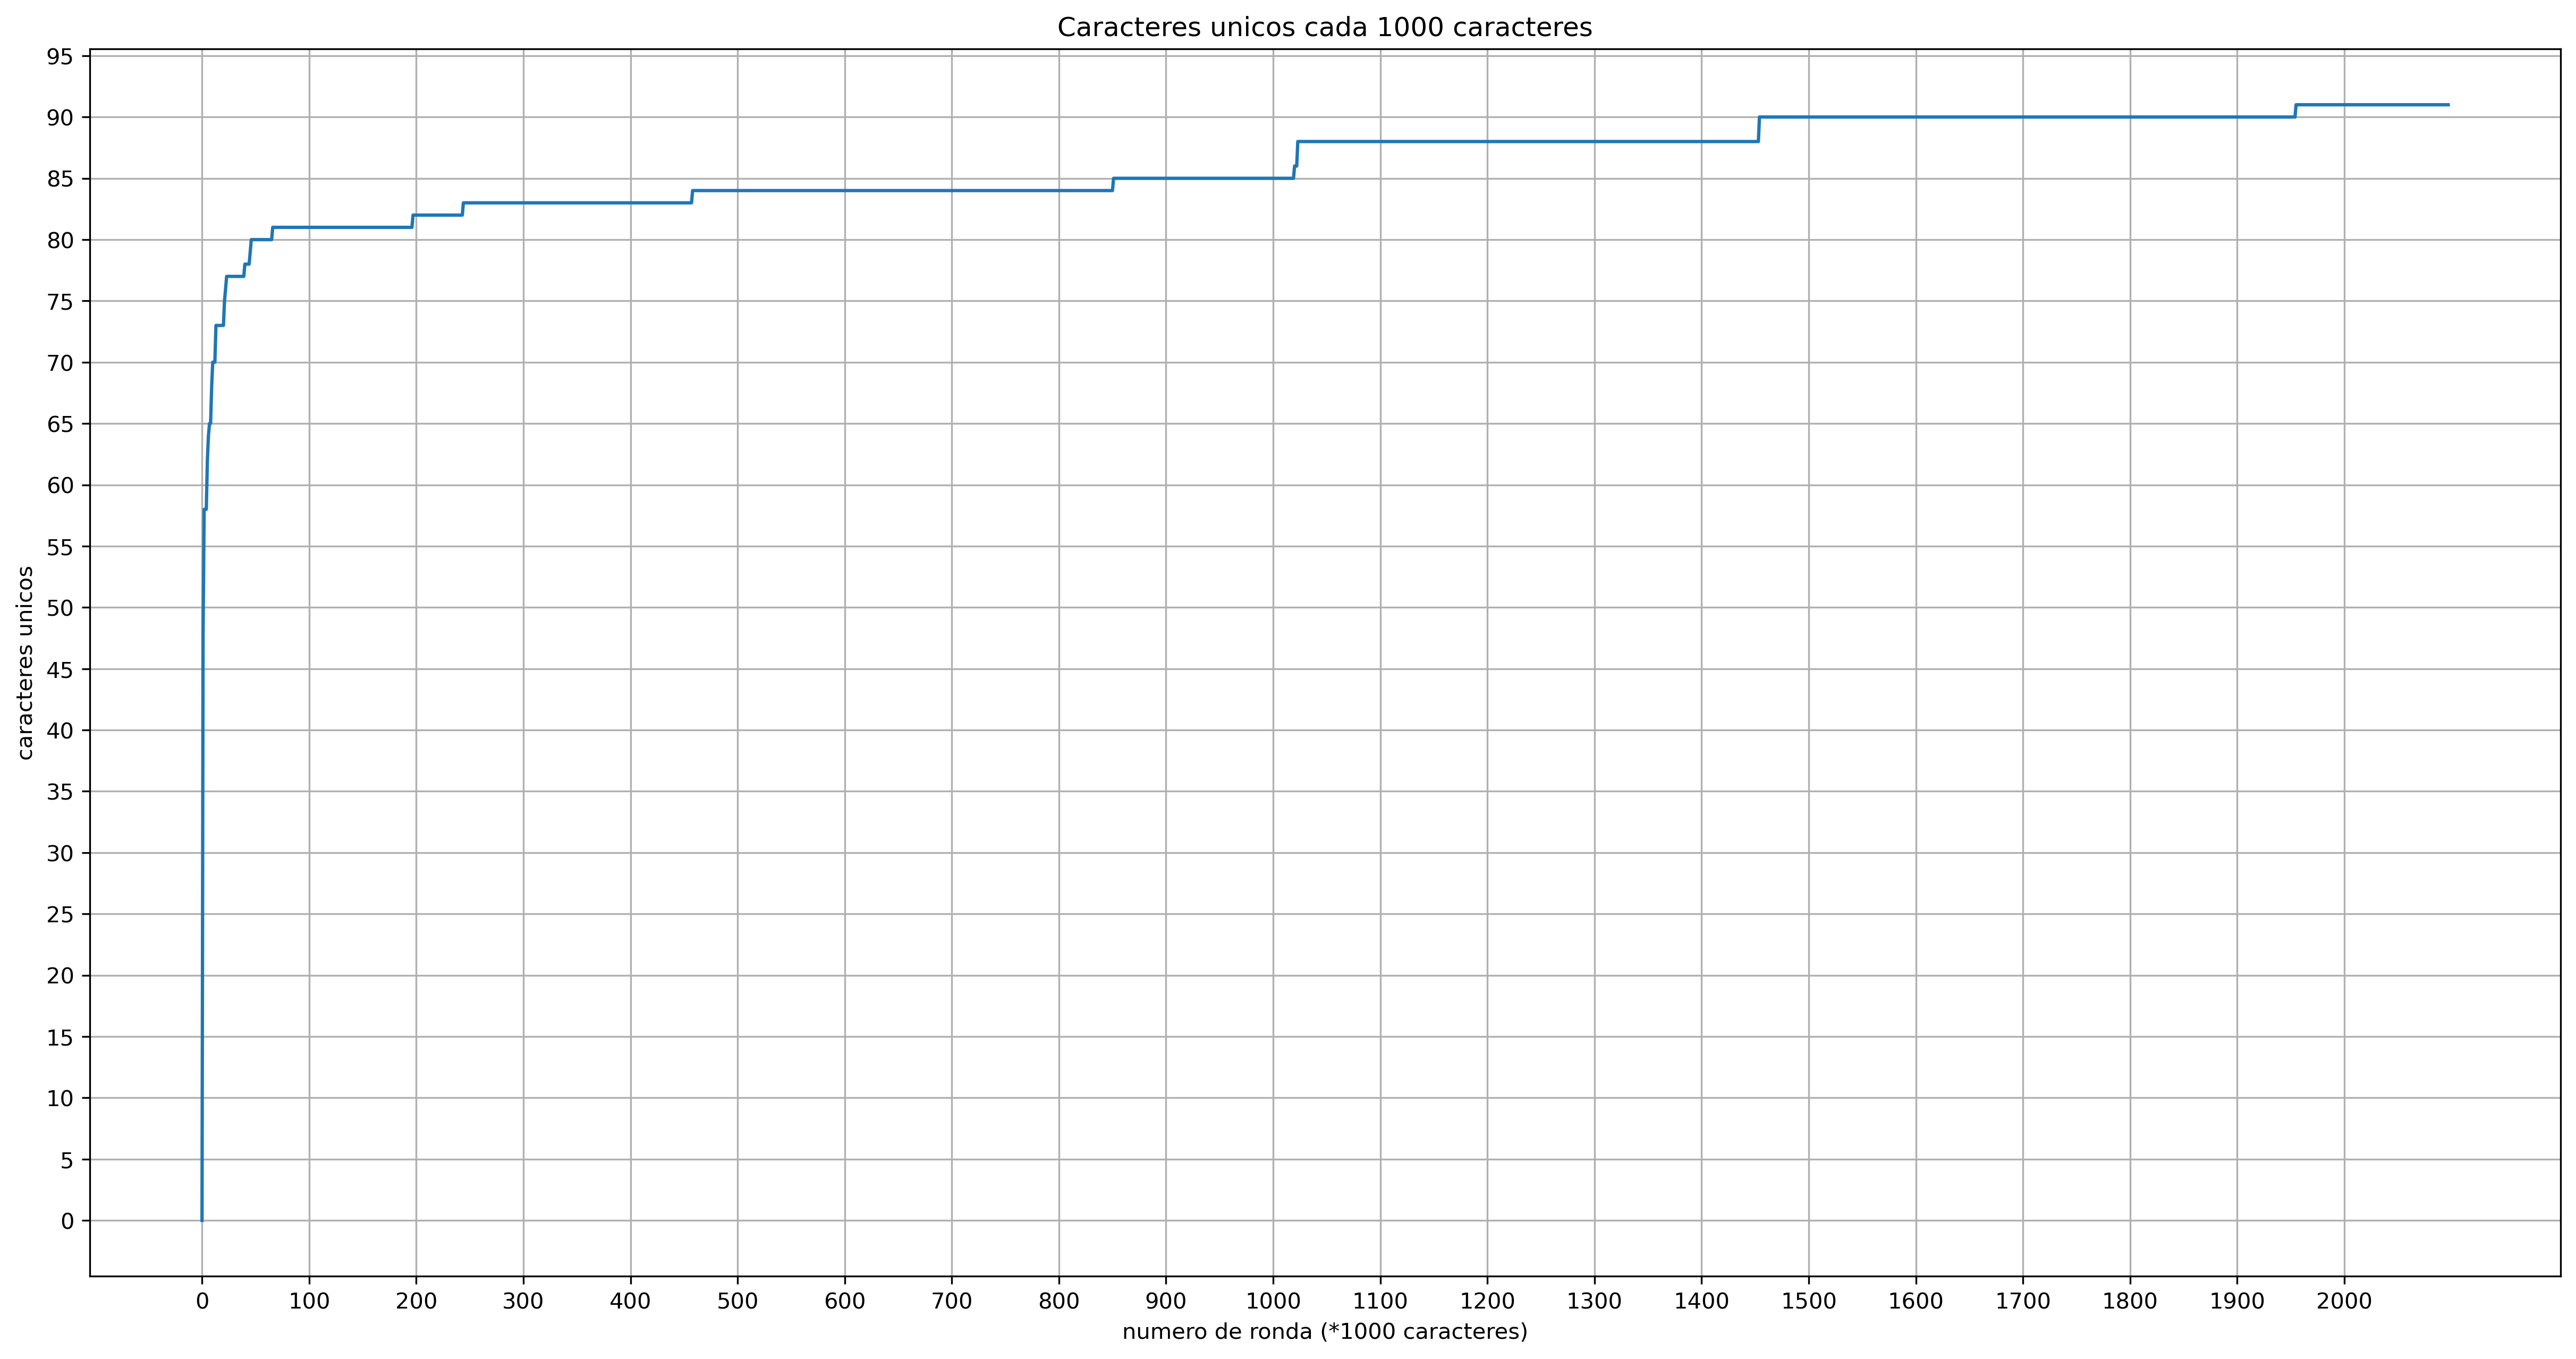

In [52]:
# esta otra version es mas rapida muestra el crecimiento del set durante todo el texto.
import matplotlib.pyplot as plt
plt.plot(charset_list_u1000)
# escala de la x en multiplos de 100
plt.xticks(range(0, 2100, 100))
# escala de la y en multiplos de 5 
plt.yticks(range(0, 100, 5))
# incluir grid en el grafico
plt.grid()
plt.title('Caracteres unicos cada 1000 caracteres')
plt.ylabel('caracteres unicos')
plt.xlabel('numero de ronda (*1000 caracteres)')
plt.show()


In [56]:
# mostramos el conjunto de caracteres unicos sin ordenar, es decir, en el orden en el que aparecen en el texto
print("".join(list( dict.fromkeys(quijote_data))))

# mostramos el conjunto de caracteres unicos ordenados alfabeticamente
charset = sorted(list( dict.fromkeys(quijote_data)))

print ("".join(charset), len(charset))


El ingeoshdaQujtMc
TASY,JGrbCámRyñqfvpéí;.VIONDLóU1604FPúz:BÉxÓ¿?-¡!XZü»H'ÁÍÑ«()"ïÚW]à7523ù

 !"'(),-.01234567:;?ABCDEFGHIJLMNOPQRSTUVWXYZ]abcdefghijlmnopqrstuvxyz¡«»¿ÁÉÍÑÓÚàáéíïñóùúü 91


In [57]:
# procedemos a analizar la distribucion de los caracteres en el texto
# para ello creamos un diccionario con el caracter como clave y el numero de veces que aparece como valor

from collections import Counter
c = Counter(quijote_data)

sorted(c.items(), key=lambda x: x[1], reverse=True)

# guardamos la coleccion ordenada por ocurrencias
sorted_c = sorted(c.items(), key=lambda x: x[1], reverse=True)


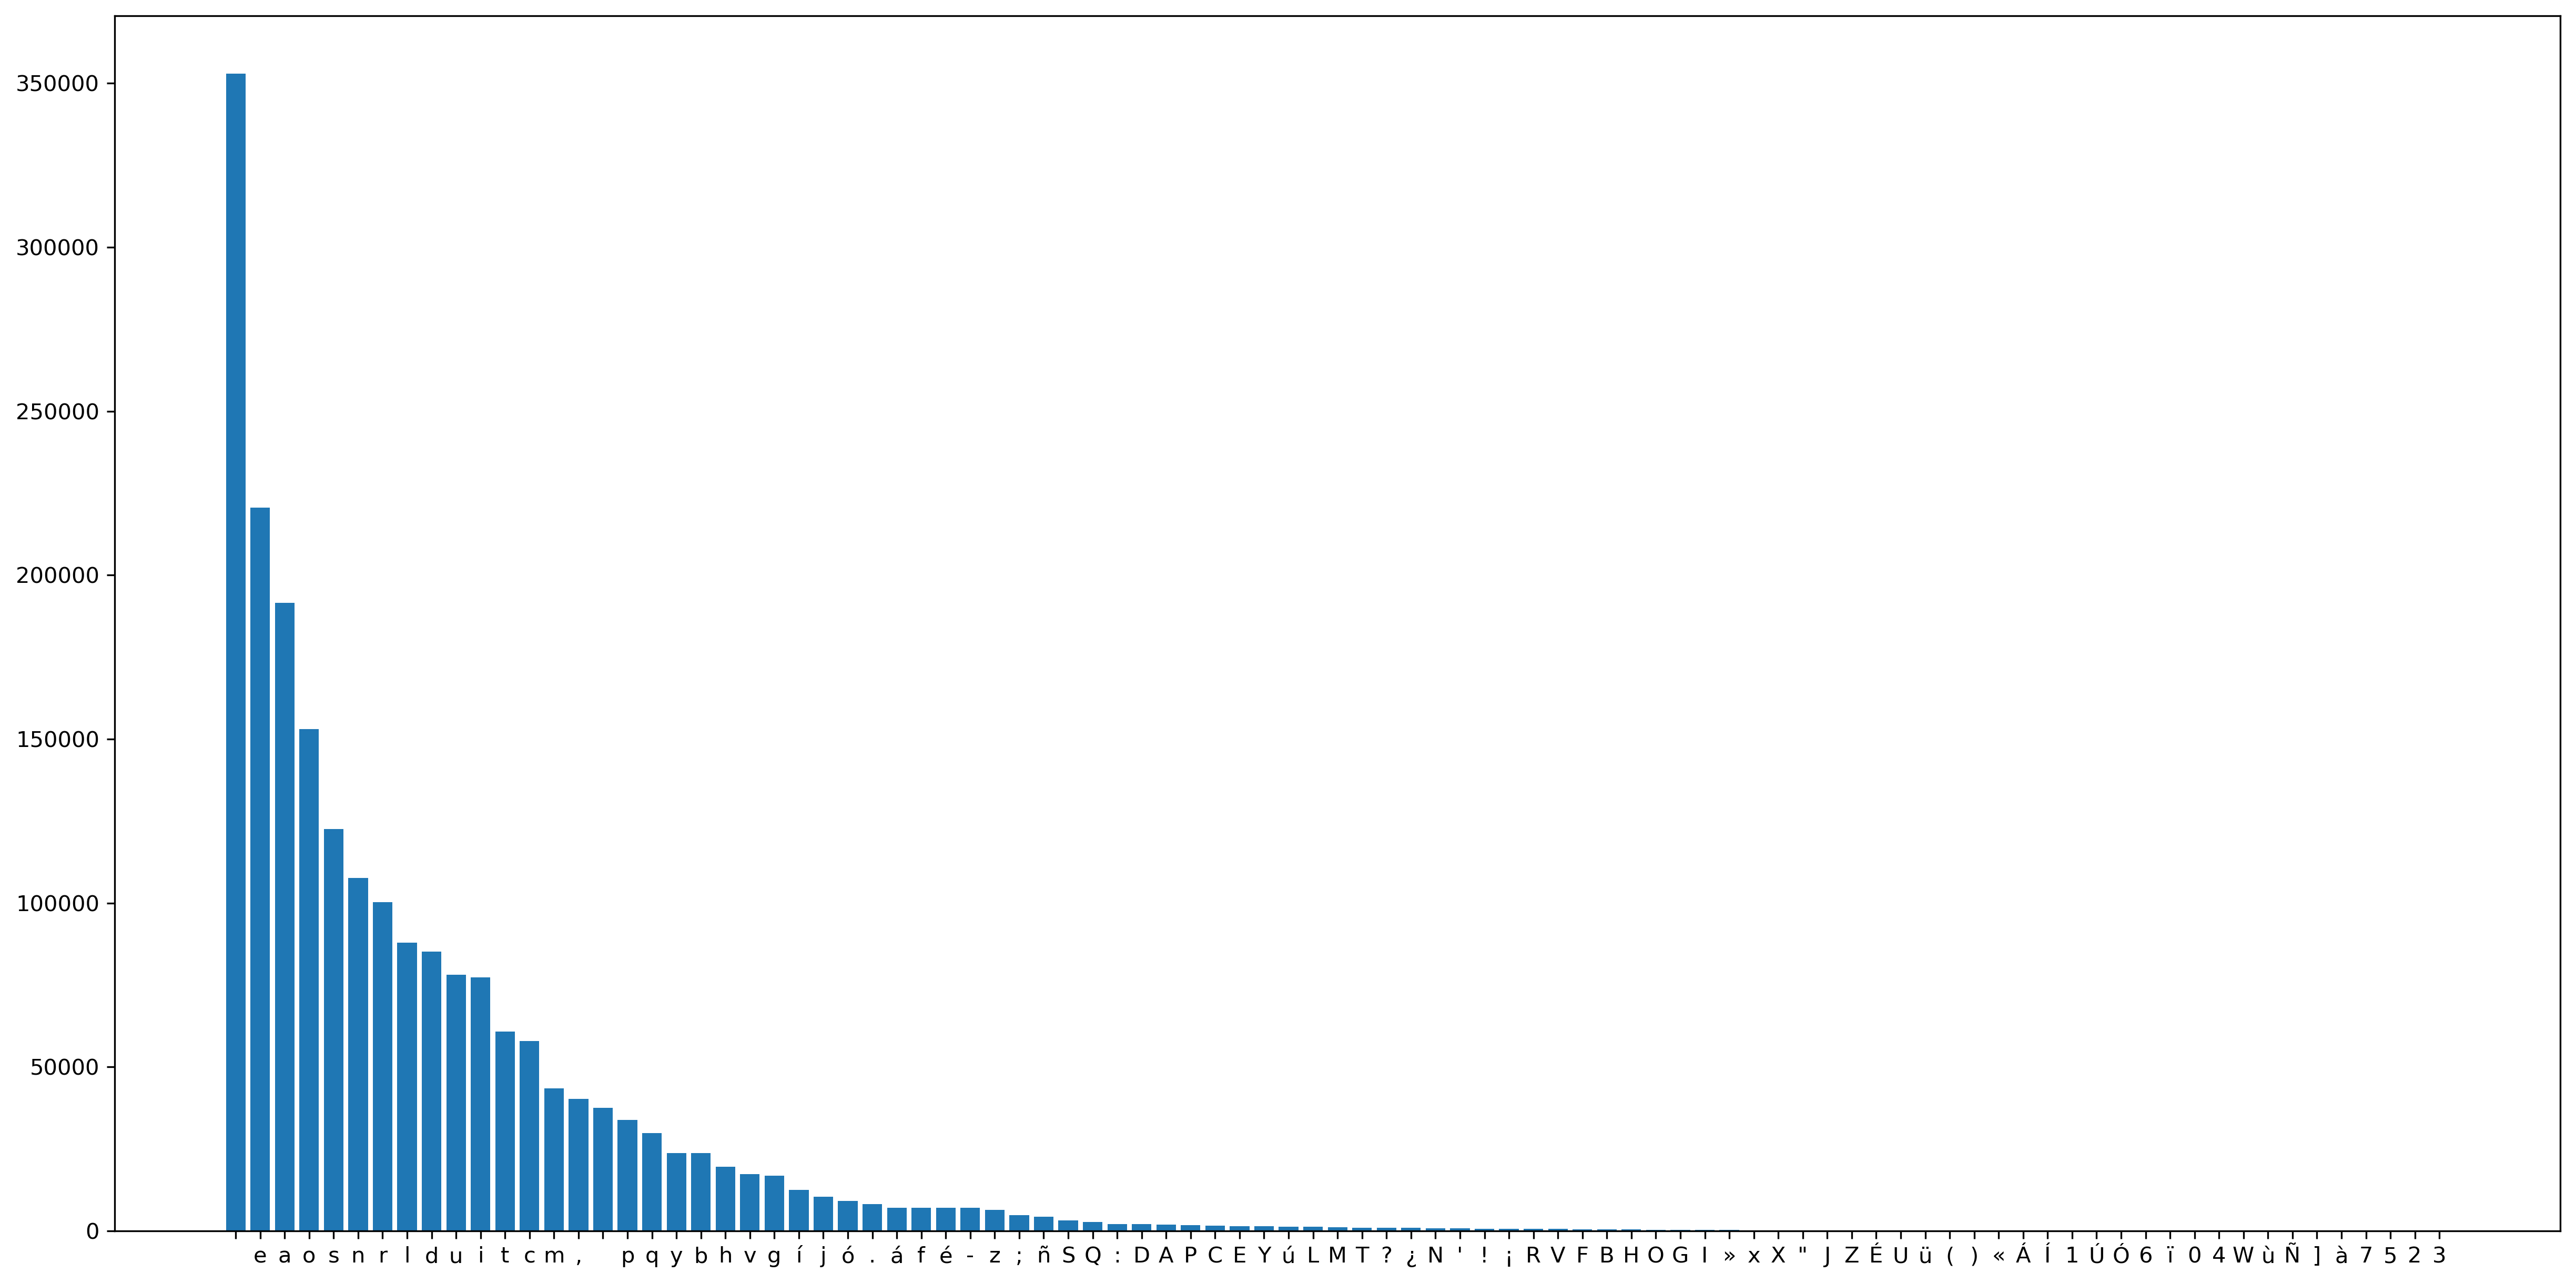

In [58]:

# mostrar la distribucion de los caracteres en el texto

plt.bar(range(u), [x[1] for x in sorted_c[:u]], align='center')
plt.xticks(range(u), [x[0] for x in sorted_c[:u]])
plt.show()


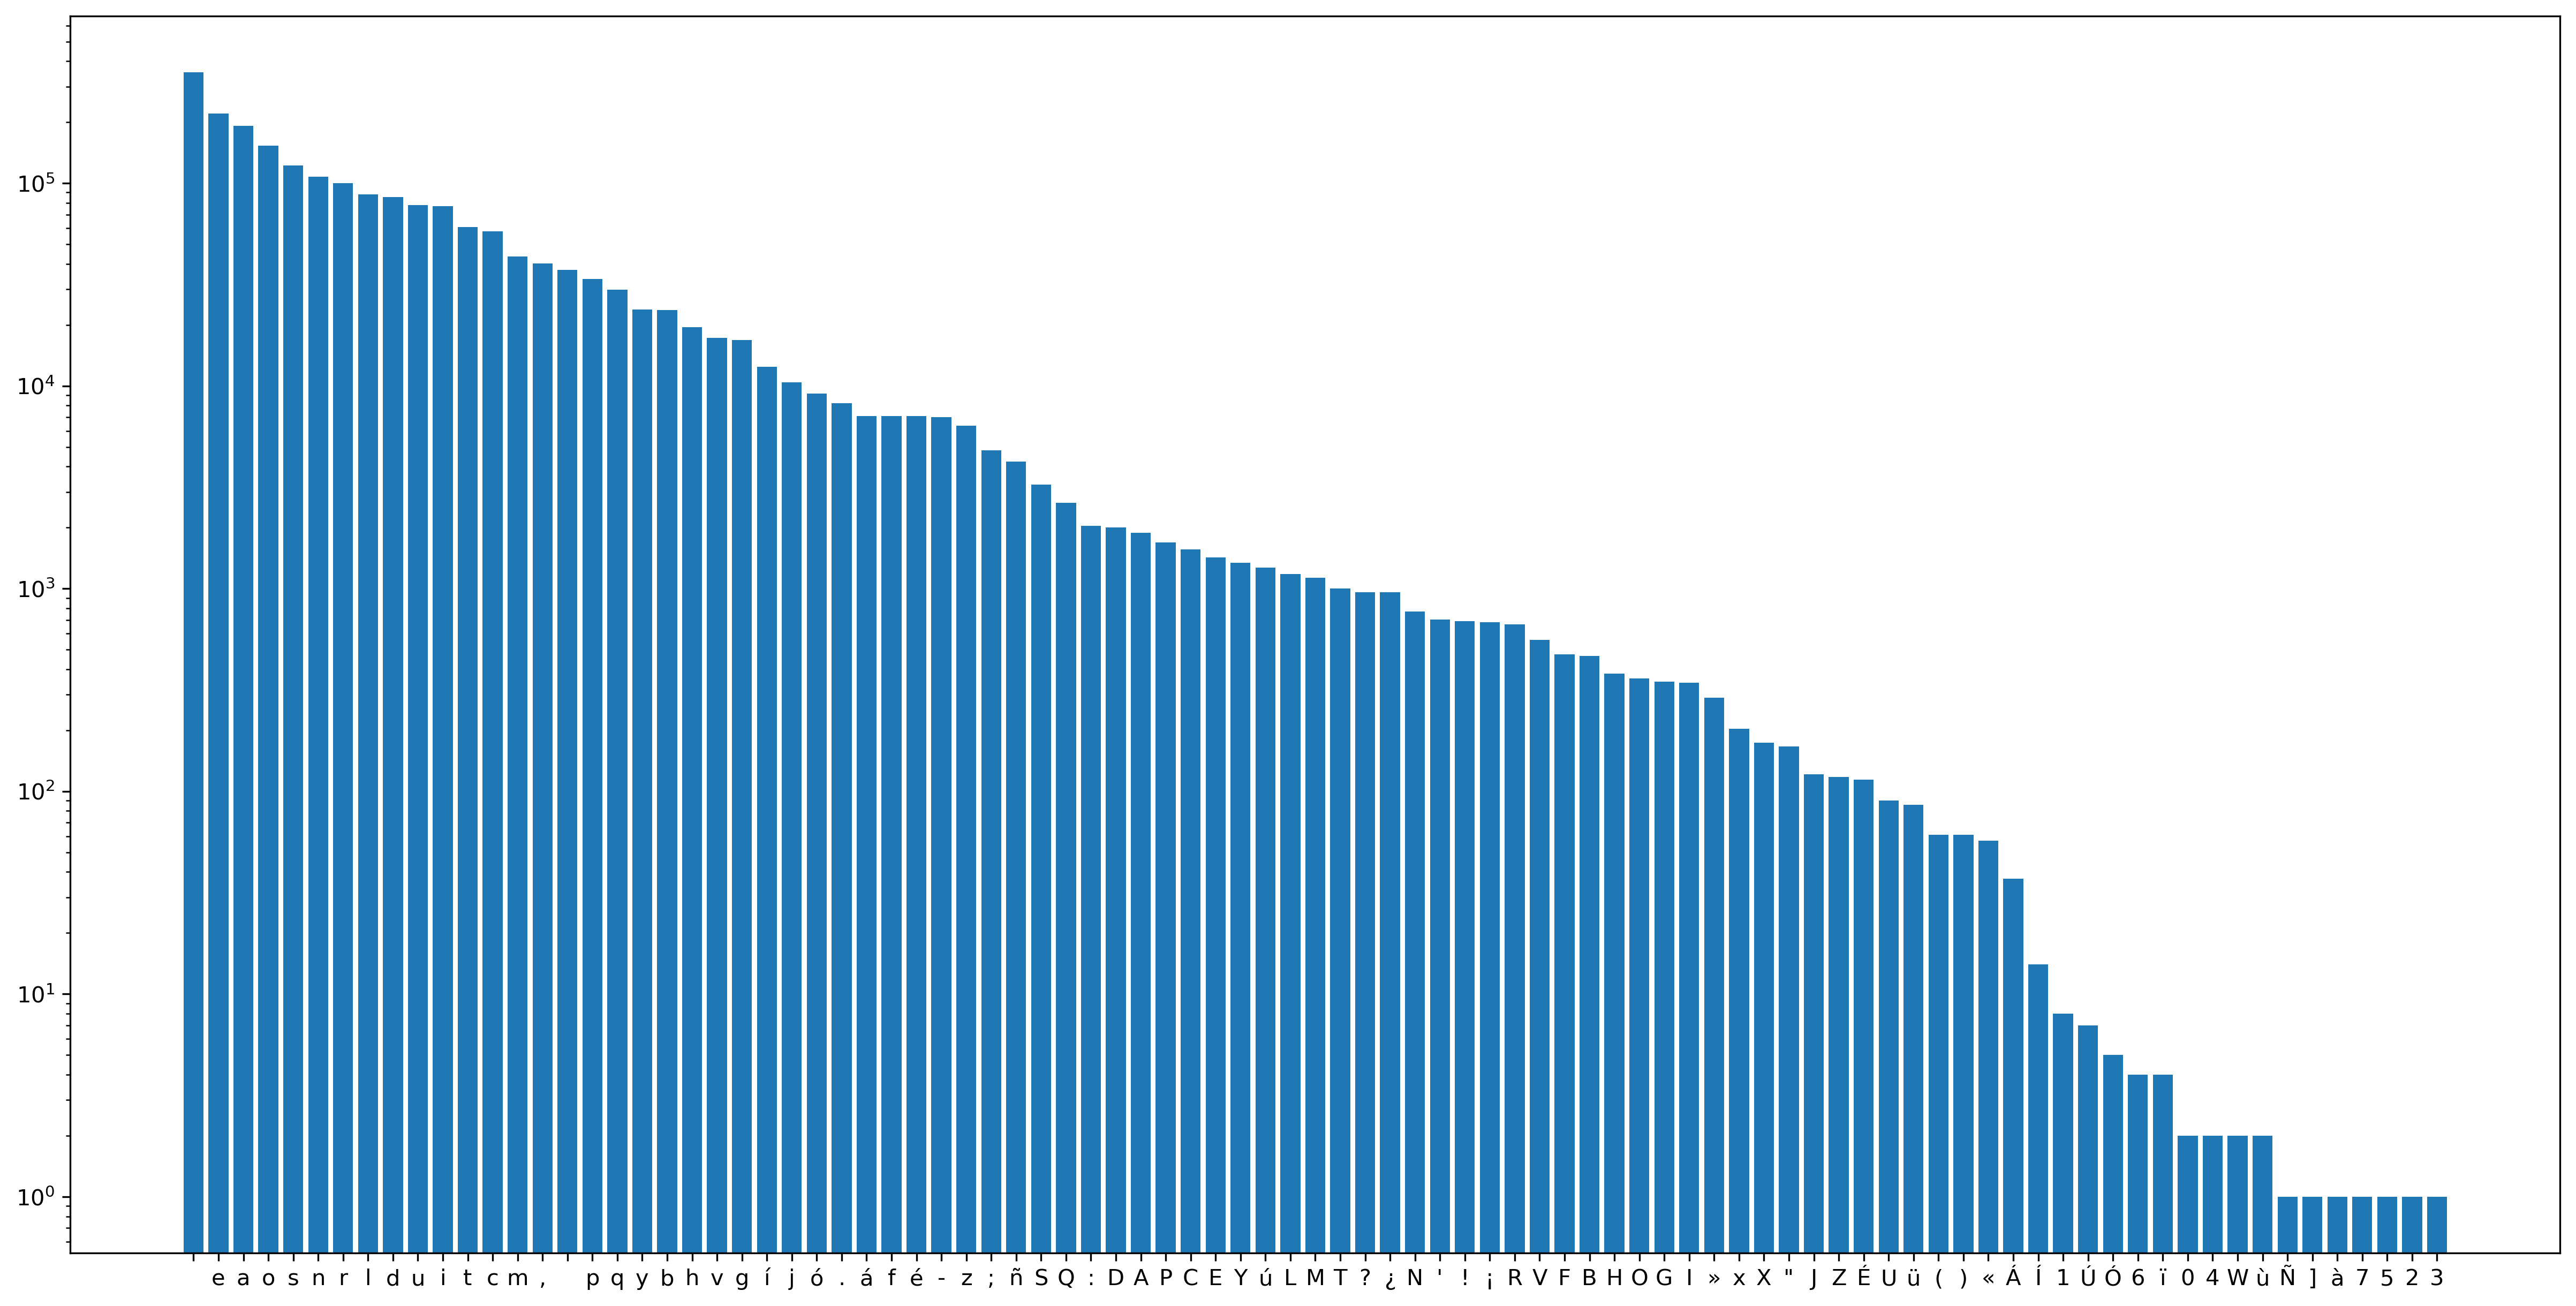

In [59]:

# dado que en esta escala no se aprecia bien la distribucion, vamos a pintarla en escala logaritmica

plt.bar(range(u), [x[1] for x in sorted_c[:u]], align='center')
plt.xticks(range(u), [x[0] for x in sorted_c[:u]])
plt.yscale('log')
plt.show()



In [61]:
# vamos ahora a imprimir los caracteres en orden de frecuencia en una cadena de texto

print("".join([x[0] for x in sorted_c]))


 eaosnrlduitcm,
pqybhvgíjó.áfé-z;ñSQ:DAPCEYúLMT?¿N'!¡RVFBHOGI»xX"JZÉUü()«ÁÍ1ÚÓ6ï04WùÑ]à7523
